In [0]:
# olivett 数据集
from sklearn.datasets import fetch_lfw_people

# 特征提取模块
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 特征缩放模块
from sklearn.preprocessing import StandardScaler 

# 标准模块
from time import time 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline 
# 保证图片直接在笔记本中出现

# scikit-learn的特征选择模块
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# 矩阵
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

# 机器学习模块
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 

In [0]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [0]:
n_samples, h, w = lfw_people.images.shape
n_samples, h, w

(1288, 50, 37)

In [0]:
# 直接使用 不管相对像素位置

X = lfw_people.data
y = lfw_people.target
n_features = X.shape[1]

n_features

1850

In [0]:
X.shape

(1288, 1850)

'Hugo Chavez'

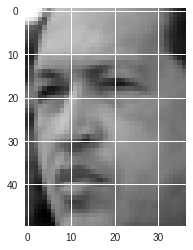

In [0]:
# 画一张脸
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]

'Hugo Chavez'

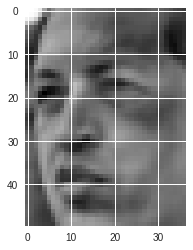

In [0]:
plt.imshow(StandardScaler().fit_transform(X)[0].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]

In [0]:
# 预测图片是谁

target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [0]:
# 数据分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [0]:
# PCA实例化
pca = PCA(n_components=200, whiten=True)

# 创建流水线 进行扩充 然后PCA
preprocessing = Pipeline([('scale', StandardScaler()), ('pca', pca)])

In [0]:
print("Extracting the top %d eigenfaces from %d faces" % (200, X_train.shape[0]))

# 在训练集上拟合数据
preprocessing.fit(X_train)

# 从流水线上取PCA
extracted_pca = preprocessing.steps[1][1]

Extracting the top 200 eigenfaces from 966 faces


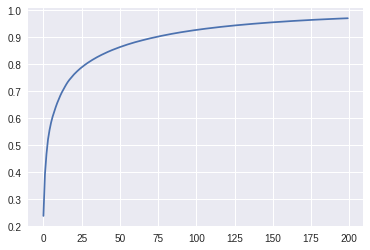

In [0]:
# 碎石图

plt.plot(np.cumsum(extracted_pca.explained_variance_ratio_))

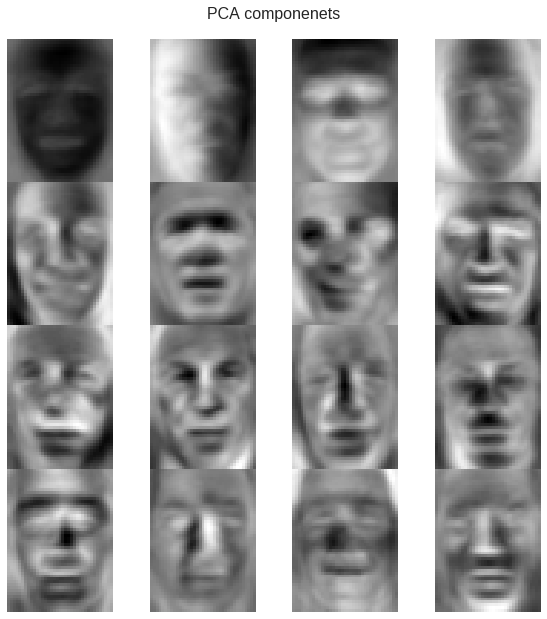

In [0]:
comp = extracted_pca.components_
image_shape = (h, w)
def plot_gallery(title, images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,            
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    plt.show()    
plot_gallery('PCA componenets', comp[:16], 4,4)

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.8136645962732919 Accuracy score for best estimator
                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.68      0.70        19
     Colin Powell       0.85      0.71      0.77        55
  Donald Rumsfeld       0.62      0.72      0.67        25
    George W Bush       0.88      0.91      0.89       142
Gerhard Schroeder       0.79      0.84      0.81        31
      Hugo Chavez       0.87      0.81      0.84        16
       Tony Blair       0.71      0.71      0.71        34

      avg / total       0.82      0.81      0.81       322

None
55.5 seconds to grid search and predict the test set


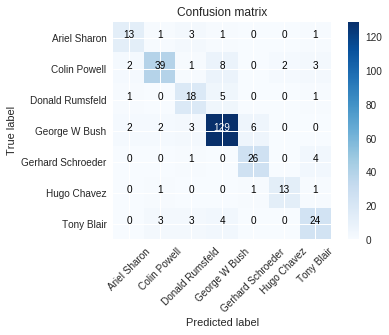

In [0]:
# 不用PCA 看时间差
t0 = time()
logreg = LogisticRegression()

param_grid = {'C': [1e-2, 1e-1,1e0,1e1, 1e2]}
clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train, y_train)
best_clf = clf.best_estimator_

# 用测试集预测姓名
y_pred = best_clf.predict(X_test)

print(accuracy_score(y_pred, y_test), "Accuracy score for best estimator")
print(classification_report(y_test, y_pred, target_names=target_names))
print(plot_confusion_matrix(confusion_matrix(y_test, y_pred, labels=range(n_classes)), target_names))
print(round((time() - t0), 1), "seconds to grid search and predict the test set")

0.7453416149068323 Accuracy score for best estimator
                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.58      0.63        19
     Colin Powell       0.73      0.64      0.68        55
  Donald Rumsfeld       0.62      0.64      0.63        25
    George W Bush       0.81      0.88      0.84       142
Gerhard Schroeder       0.81      0.71      0.76        31
      Hugo Chavez       0.59      0.62      0.61        16
       Tony Blair       0.64      0.62      0.63        34

      avg / total       0.74      0.75      0.74       322

None
75.7 seconds to grid search and predict the test set


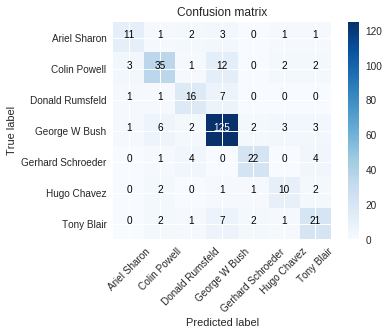

In [0]:
# 用PCA 看时间变化
t0 = time()

face_pipeline = Pipeline(steps=[('PCA', PCA(n_components=200)), ('logistic', logreg)])

pipe_param_grid = {'logistic__C': [1e-2, 1e-1,1e0,1e1, 1e2]}
clf = GridSearchCV(face_pipeline, pipe_param_grid)
clf = clf.fit(X_train, y_train)
best_clf = clf.best_estimator_

# 用测试集预测姓名
y_pred = best_clf.predict(X_test)

print(accuracy_score(y_pred, y_test), "Accuracy score for best estimator")
print(classification_report(y_test, y_pred, target_names=target_names))
print(plot_confusion_matrix(confusion_matrix(y_test, y_pred, labels=range(n_classes)), target_names))
print(round((time() - t0), 1), "seconds to grid search and predict the test set")

In [0]:
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,           # 网格搜索的模型
                        params,          # 搜索的参数
                        error_score=0.)  # 如果出错 正确率是0
    grid.fit(X, y)           # 拟合模型和参数
    # 经典性能参数
    print("Best Accuracy: {}".format(grid.best_score_))
    # 最佳精度的最佳参数
    print("Best Parameters: {}".format(grid.best_params_))
    # 平均拟合数据的时间（秒）
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # 平均预测数据的时间（秒）
    # 这个参数会帮助实时分析
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [0]:
# 网格搜索的大型流水线
face_params = {'logistic__C':[1e-2, 1e-1, 1e0, 1e1, 1e2], 
               'preprocessing__pca__n_components':[100, 150, 200, 250, 300],
               'preprocessing__pca__whiten':[True, False],
               'preprocessing__lda__n_components':range(1, 7)  
               # [1, 2, 3, 4, 5, 6] recall the max allowed is n_classes-1
              }

pca = PCA()
lda = LinearDiscriminantAnalysis()

preprocessing = Pipeline([('scale', StandardScaler()), ('pca', pca), ('lda', lda)])

logreg = LogisticRegression()
face_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('logistic', logreg)])

get_best_model_and_accuracy(face_pipeline, face_params, X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. 

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. 

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. 

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. 

In [0]:
! wget "https://github.com/PacktPublishing/Feature-Engineering-Made-Easy/raw/master/Chapter06/7282_1.csv"

--2018-07-25 03:58:22--  https://github.com/PacktPublishing/Feature-Engineering-Made-Easy/raw/master/Chapter06/7282_1.csv
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PacktPublishing/Feature-Engineering-Made-Easy/master/Chapter06/7282_1.csv [following]
--2018-07-25 03:58:22--  https://raw.githubusercontent.com/PacktPublishing/Feature-Engineering-Made-Easy/master/Chapter06/7282_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16512478 (16M) [text/plain]
Saving to: ‘7282_1.csv’

7282_1.csv          100%[===================>]  15.75M  21.2MB/s    in 0.7s    

2018-07-25 03:58

In [0]:
# 行正则化
from sklearn.preprocessing import Normalizer

# scikit-learn的KMeans聚类模块
from sklearn.cluster import KMeans

# 数据修改工具
import pandas as pd

# NLTK的分词工具
from nltk.tokenize import sent_tokenize

# 特征提取模块（之后会涉及TruncatedSVD）
from sklearn.decomposition import PCA 
from sklearn.decomposition import TruncatedSVD

In [0]:
hotel_reviews = pd.read_csv('7282_1.csv')

In [0]:
hotel_reviews.shape

(35912, 19)

In [0]:
hotel_reviews.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


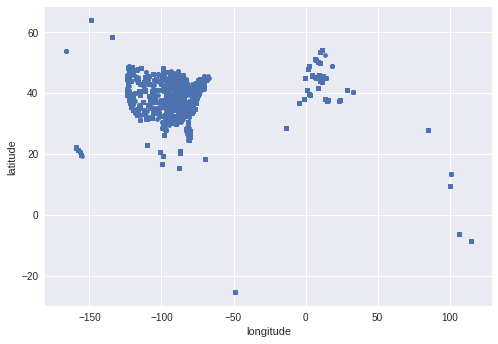

In [0]:
# 评论的经纬度
hotel_reviews.plot.scatter(x='longitude', y='latitude')

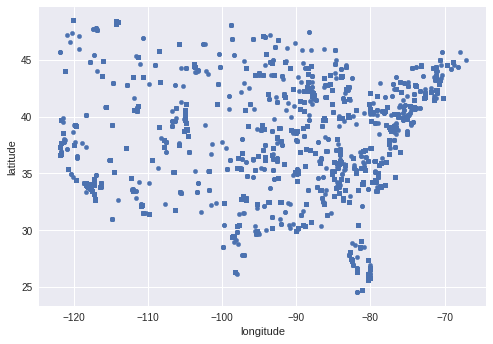

In [0]:
# 只看美国的评论
hotel_reviews = hotel_reviews[((hotel_reviews['latitude']<=50.0) & (hotel_reviews['latitude']>=24.0)) & ((hotel_reviews['longitude']<=-65.0) & (hotel_reviews['longitude']>=-122.0))]

# 再绘制一次经纬度
hotel_reviews.plot.scatter(x='longitude', y='latitude')
# 只有美国的评论

In [0]:
hotel_reviews.shape

(30692, 19)

In [0]:
texts = hotel_reviews['reviews.text']

In [0]:
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from functools import reduce

In [0]:
sent_tokenize("hello! I am Sinan. How are you??? I am fine")

['hello!', 'I am Sinan.', 'How are you???', 'I am fine']

In [0]:
sentences = reduce(lambda x, y:x+y, texts.apply(lambda x: sent_tokenize(str(x))))

In [0]:
# 句子总数
len(sentences)

118151

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

tfidf_transformed = tfidf.fit_transform(sentences)

tfidf_transformed

<118151x280901 sparse matrix of type '<class 'numpy.float64'>'
	with 1180273 stored elements in Compressed Sparse Row format>

In [0]:
# 尝试PCA拟合
PCA(n_components=1000).fit(tfidf_transformed)


TypeError: ignored

In [0]:
from sklearn.preprocessing import StandardScaler

# 从scikit-learn导入花卉数据
from sklearn.datasets import load_iris

# 导入塑化剂
iris = load_iris()

# 分离特征和响应
iris_X, iris_y = iris.data, iris.target

X_centered = StandardScaler(with_std=False).fit_transform(iris_X)
X_scaled = StandardScaler().fit_transform(iris_X)

In [0]:
# 是不是结果一样
svd = TruncatedSVD(n_components=2)
pca = PCA(n_components=2)

In [0]:
# PCA和TruncatedSVD是不是一样？
# 看相减是不是近乎0
print((pca.fit(iris_X).components_ - svd.fit(iris_X).components_).mean())  # 不是
# 我们不一样

# 中心版PCA和TruncatedSVD是不是一样？
print((pca.fit(X_centered).components_ - svd.fit(X_centered).components_).mean())  # 接近0
# 数据一样

# 缩放版PCA和TruncatedSVD是不是一样
print((pca.fit(X_scaled).components_ - svd.fit(X_scaled).components_).mean())  # 接近0
# 一样

0.1301831230943786
7.632783294297951e-17
3.469446951953614e-17


In [0]:
svd = TruncatedSVD(n_components=1000)
svd.fit(tfidf_transformed)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
       random_state=None, tol=0.0)

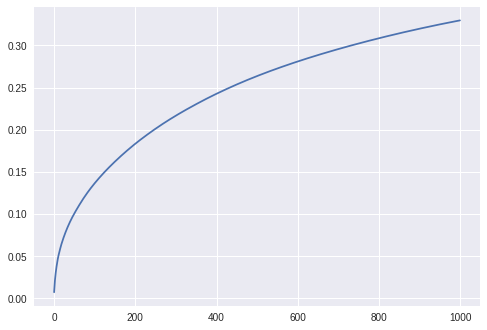

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# 碎石图

plt.plot(np.cumsum(svd.explained_variance_ratio_))

In [0]:

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from time import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [0]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
svd = TruncatedSVD(n_components=10)  # will extract 10 "topics"
normalizer = Normalizer() # will give each document a unit norm

lsa = Pipeline(steps=[('tfidf', tfidf), ('svd', svd), ('normalizer', normalizer)])

In [0]:
lsa_sentences = lsa.fit_transform(sentences)

lsa_sentences.shape

(118151, 10)

In [0]:
cluster = KMeans(n_clusters=10)

cluster.fit(lsa_sentences)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
%%timeit
# 原始(118151, 280901)数据集的速度
cluster.fit(tfidf_transformed)

In [0]:
%%timeit
# 也对K均值的预测进行计时
cluster.predict(tfidf_transformed)

In [0]:
%%timeit
# LSA(118151, 10)数据集的速度
cluster.fit(lsa_sentences)

In [0]:
# LSA(118151, 10)数据集的预测速度
cluster.predict(lsa_sentences)

In [0]:
cluster.transform(lsa_sentences).shape
predicted_cluster = cluster.predict(lsa_sentences)
predicted_cluster

In [0]:
# "topics"的分布
pd.Series(predicted_cluster).value_counts(normalize=True)# create DataFrame of texts and predicted topics
texts_df = pd.DataFrame({'text':sentences, 'topic':predicted_cluster})

texts_df.head()

print("Top terms per cluster:")
original_space_centroids = svd.inverse_transform(cluster.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = lsa.steps[0][1].get_feature_names()
for i in range(10):
    print("Cluster {i}:".format(i = i))
    print(', '.join([terms[ind] for ind in order_centroids[i, :5]]))
    print()

lsa.steps[0][1]

In [0]:
# 预测
print(cluster.predict(lsa.transform(['I definitely recommend this hotel'])))

print(cluster.predict(lsa.transform(['super friendly staff. Love it!'])))